# ZEB Distance to Summit

Plot histogram of ZEB's distance to peak summit.

Based on `20210321_ZEB_vPlot/VPlot.ipynb`

**Inputs**:
1. A bed intersection file which has peak summit and motif instance (see original notebook repo)

In [11]:
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Load Inputs

In [57]:
# TODO: prepare this BED file in a more reproducible manner 
ZEB_motifs = read.table("../../analysis//20210321_ZEB_vPlot/fibr.summit.int.SNAI.bed")[,1:6] # first 3 columns are peaks, next 3 are hits
colnames(ZEB_motifs) = c("chr", "start", "end", "chr", "motif_start", "motif_end")
ZEB_motifs$dist_to_summit = abs(as.integer((ZEB_motifs$start + ZEB_motifs$end)/2 - (ZEB_motifs$motif_start+ZEB_motifs$motif_end)/2))

# ZEB_motifs$dist_to_summit[ZEB_motifs$dist_to_summit < -100] = -100
# ZEB_motifs$dist_to_summit[ZEB_motifs$dist_to_summit > 100] = 100
head(ZEB_motifs)

,chr,start,end,chr,motif_start,motif_end,dist_to_summit
,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>
1,chr1,100132551,100133551,chr1,100132772,100132778,276
2,chr1,100132212,100133212,chr1,100132772,100132778,63
3,chr1,100188365,100189365,chr1,100188653,100188659,209
4,chr1,10032309,10033309,chr1,10032720,10032726,86
5,chr1,100530575,100531575,chr1,100531214,100531220,142
6,chr1,100539006,100540006,chr1,100539659,100539665,156


In [58]:
dim(ZEB_motifs)

[1] 25016     7

In [59]:
# for motifs close to multiple summits, choose closest
ZEB_motifs$summit = paste(paste(ZEB_motifs$chr, ZEB_motifs$start, sep=':'), 
                          ZEB_motifs$end, sep='-')

In [60]:
length(unique(ZEB_motifs$summit))

[1] 23091

In [63]:
dists = (ZEB_motifs[,c("summit", "dist_to_summit")] %>% dplyr::group_by(summit) %>% dplyr::summarise(least=min(dist_to_summit)))$least

# subset 
dists = dists[dists<=100]

`summarise()` ungrouping output (override with `.groups` argument)



In [74]:
sum(dists>90)

[1] 1042

In [75]:
sum(dists>80)

[1] 2051

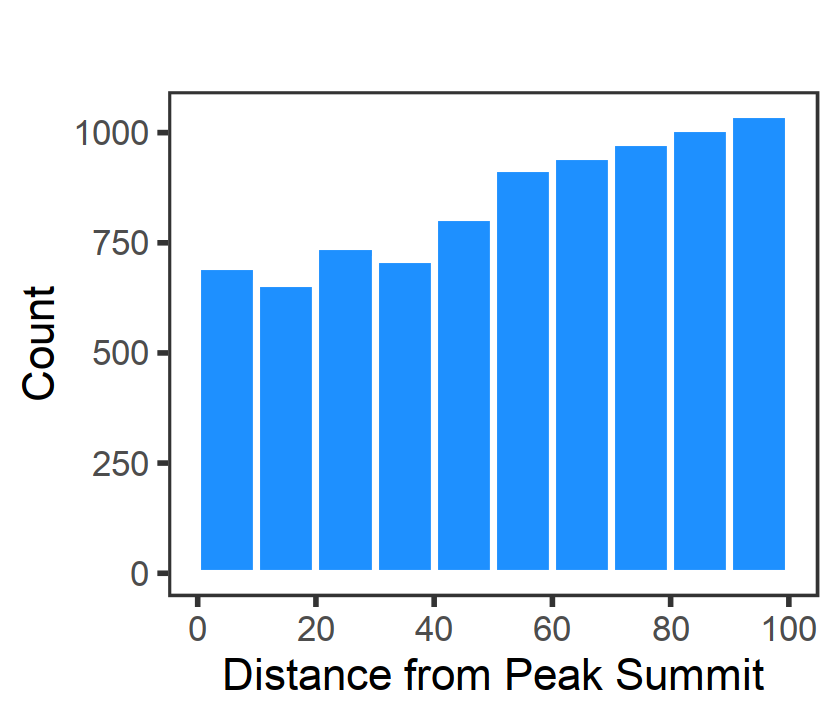

In [98]:
options(repr.plot.width = 7, repr.plot.height = 6)


ggplot(data.frame(x=dists),
      aes(x=x)) +
geom_histogram(col="white", fill="dodgerblue1", binwidth=10, boundary=0,
              size=1.5) +
xlab("Distance from Peak Summit") +
ylab("Count") + 
ggtitle(" ") +
theme_bw(base_size=26) +
scale_x_continuous(breaks = seq(0,100,20), labels = seq(0,100, 20))+
theme(plot.title = element_text(hjust = 0.5),
      panel.grid.major = element_blank(),
      panel.grid.minor = element_blank())